In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the distance matrix
D = np.loadtxt('distanceMatrix.csv', delimiter=',')
cities = ['Atl', 'Chi', 'Den', 'Hou', 'LA', 'Mia', 'NYC', 'SF', 'Sea', 'WDC']
nCities = D.shape[0]  # Get the size of the matrix

Select a number of dimensions to keep :

In [3]:
k = 2  # e.g. we want to keep 2 dimensions

MDS algorithm
## TODO: Implement MDS. The new data matrix should have name X


In [4]:
J = np.eye(nCities) - (1.0/nCities) * np.ones(nCities)
# Compute matrix B
B = -0.5 * np.dot(J, np.dot(np.power(D, 2), J))
# SVD decomposition of B        
U, L, V = np.linalg.svd(B)
# Calculate new data
X = np.dot(U[:, :k], np.sqrt(np.diag(L)[:k, :k]))

(-0.5, 597.5, 363.5, -0.5)

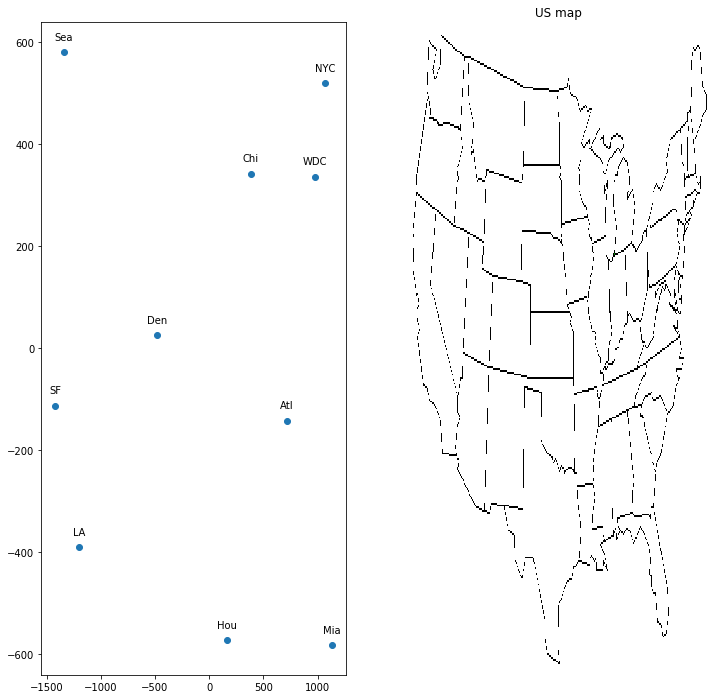

In [5]:
# Plot distances in two dimensions
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# Plot cities in 2D space
axs[0].plot(-X[:, 0], -X[:, 1], 'o')
for i in range(len(cities)):
    axs[0].text(-X[i, 0], -X[i, 1] + 30, cities[i], color='k', ha='center', va='center')

# Plot also a US map
im = plt.imread("usamap.png")
axs[1].imshow(im, aspect='auto')
axs[1].set_title("US map")
axs[1].axis('off')